**Ejercicio 1**

In [ ]:
import pandas as pd
df = pd.read_csv('life_expectancy_data.csv')
print(df.columns)
df.head()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


1.1

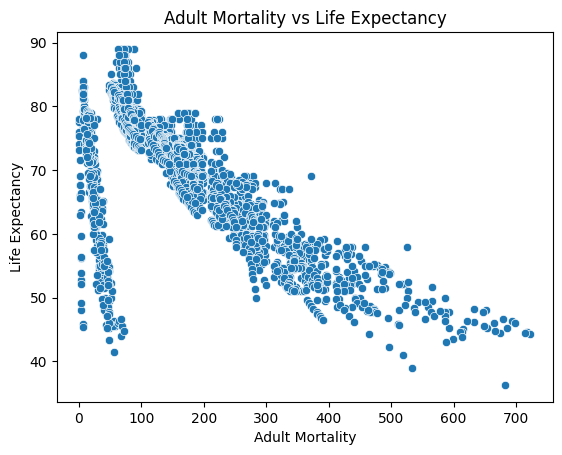

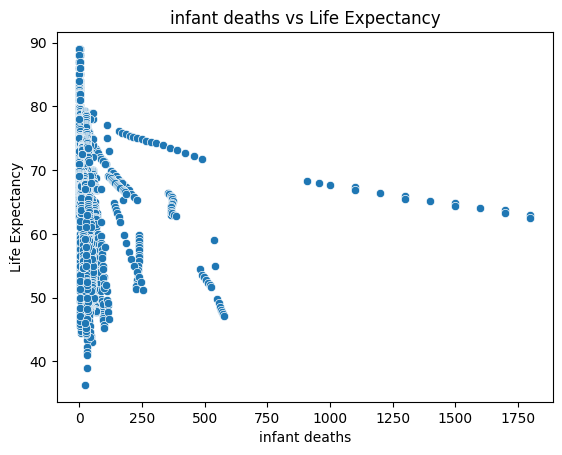

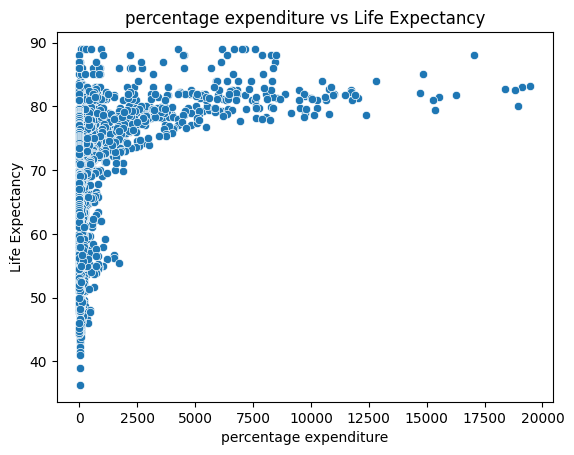

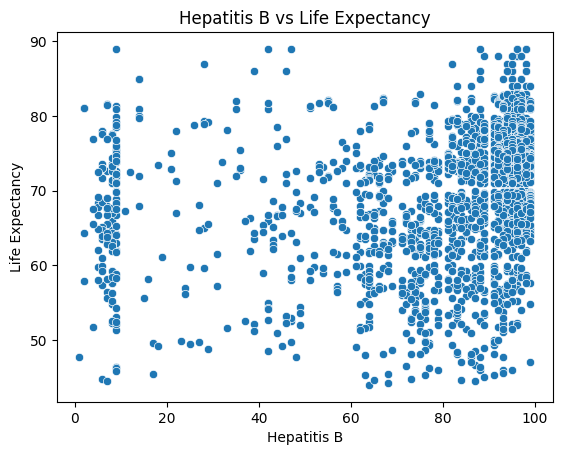

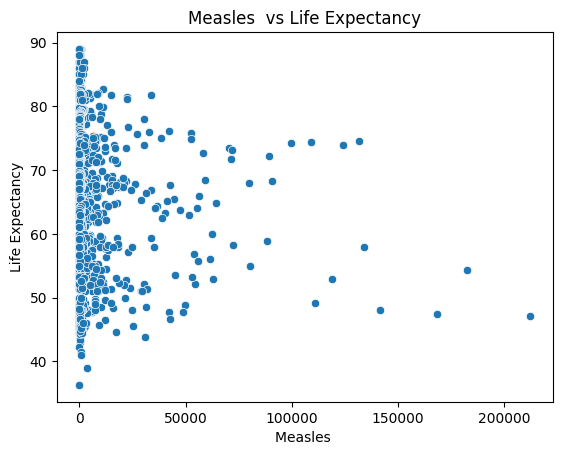

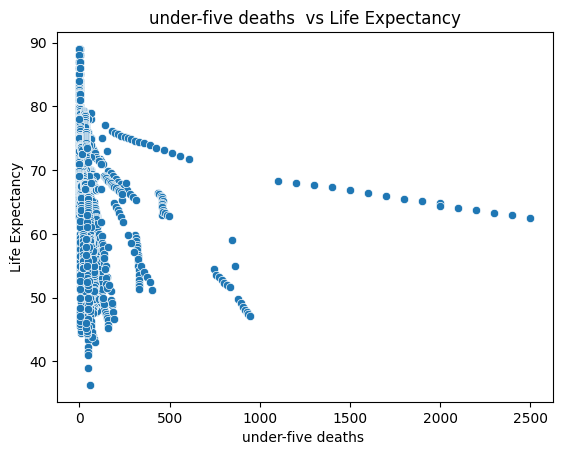

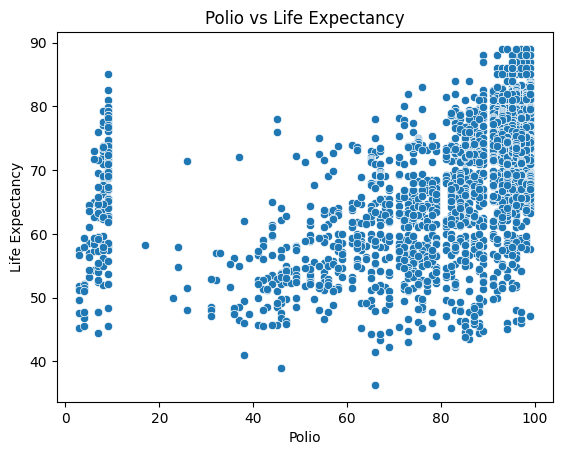

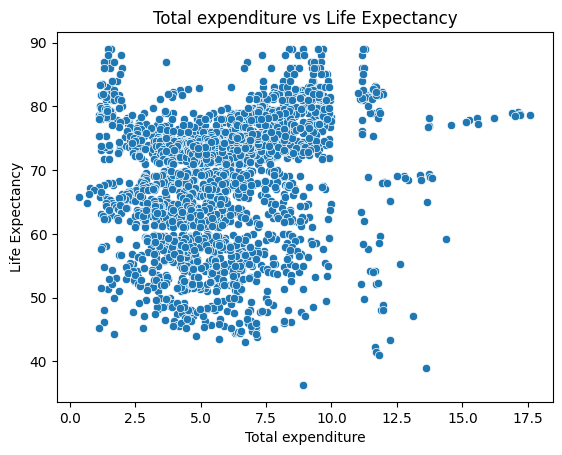

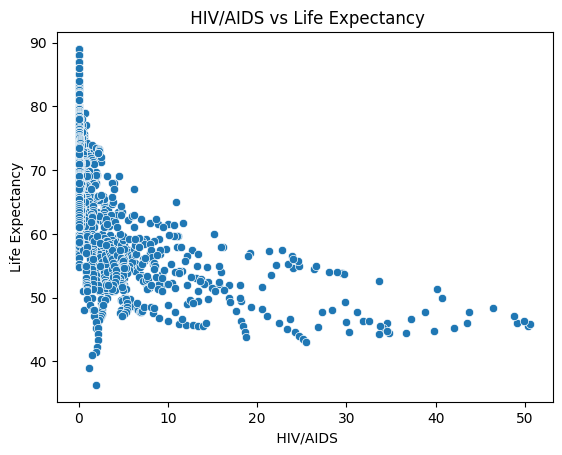

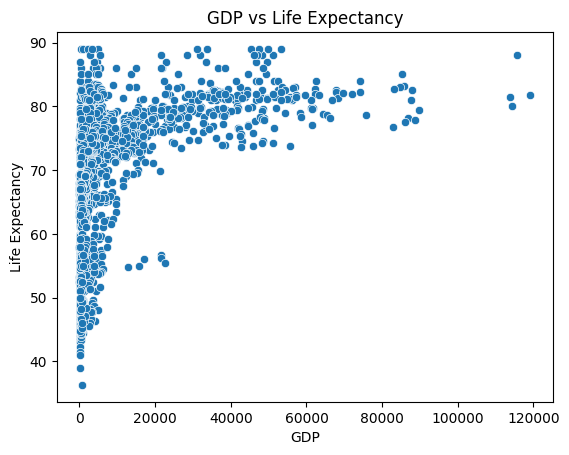

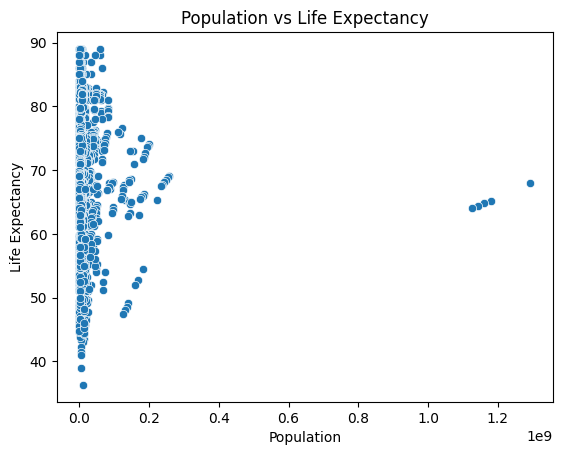

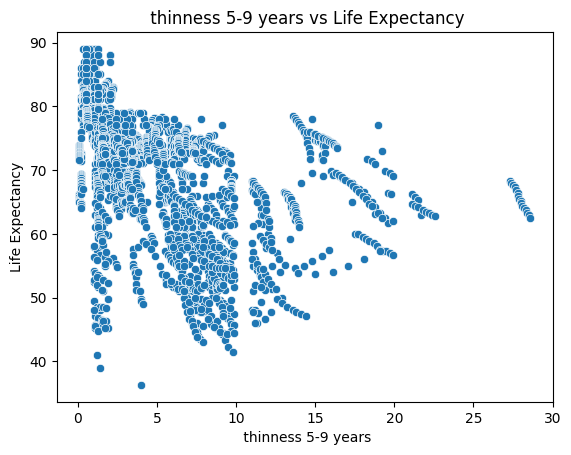

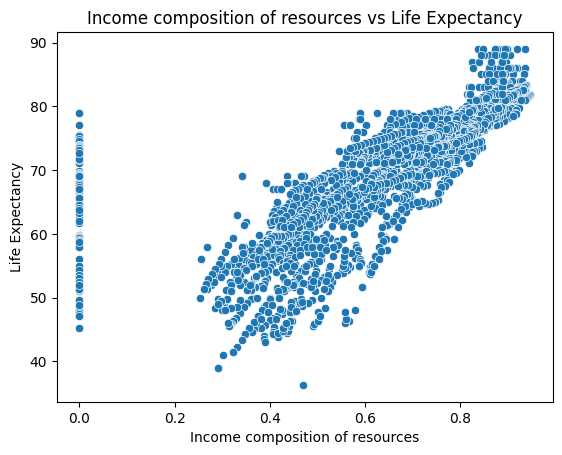

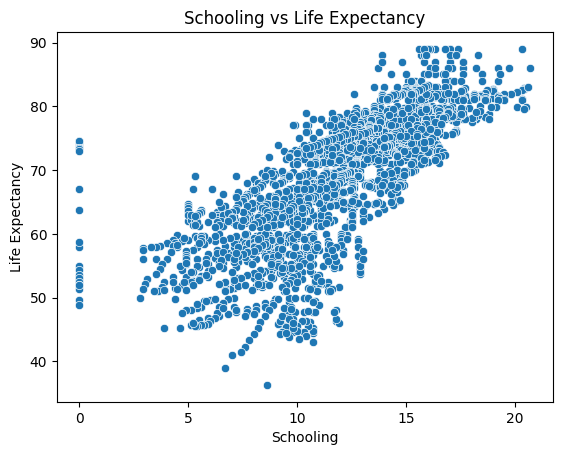

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y = df['Life expectancy ']
predictors = ['Adult Mortality', 'infant deaths', 'percentage expenditure', 'Hepatitis B',
              'Measles ', 'under-five deaths ', 'Polio', 'Total expenditure', ' HIV/AIDS',
              'GDP', 'Population', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

for predictor in predictors:
    plt.figure()
    sns.scatterplot(x=df[predictor], y=y)
    plt.title(f'{predictor} vs Life Expectancy')
    plt.xlabel(predictor)
    plt.ylabel('Life Expectancy')
    plt.show()

1.2

In [ ]:
import numpy as np

# Me daba un error al correr el código porque en algunas de las variables existen varias campos vacios. Tuve que eliminar esas filas.
df = df.dropna()
predictors = df[['Adult Mortality', 'infant deaths', 'percentage expenditure', 'Hepatitis B',
                 'Measles ', 'under-five deaths ', 'Polio', 'Total expenditure', ' HIV/AIDS',
                 'GDP', 'Population', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]

predictors = np.concatenate([np.ones((predictors.shape[0], 1)), predictors], axis=1)

# Tuve que añadir esta línea para que "Y" tuviera el mismo número de filas que las variables predictoras.
y = df['Life expectancy '].values.reshape(-1, 1)


coefficients = np.linalg.inv(predictors.T @ predictors) @ predictors.T @ y #FORMULA
print("Coefficients:", coefficients.flatten())


Coefficients: [ 5.44673903e+01 -1.74467926e-02  1.01728685e-01  3.85466290e-04
 -3.89612598e-04 -1.46642920e-05 -7.64450476e-02  1.12953878e-02
  8.49144621e-02 -4.42841446e-01  7.84321035e-06 -2.66698604e-10
 -1.04752262e-01  1.02002926e+01  9.15343265e-01]


1.3

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []
mse_scores = []
mae_scores = []

for train_index, test_index in kf.split(predictors):
    X_train, X_test = predictors[train_index], predictors[test_index]
    y_train, y_test = y[train_index], y[test_index]
    coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    y_pred = X_test @ coefficients

    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))


avg_r2 = np.mean(r2_scores)
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)

print("Average R-squared:", avg_r2)
print("Average Mean Squared Error:", avg_mse)
print("Average Mean Absolute Error:", avg_mae)

Average R-squared: 0.8215107670783477
Average Mean Squared Error: 13.60880147431998
Average Mean Absolute Error: 2.820500340784176


1.4

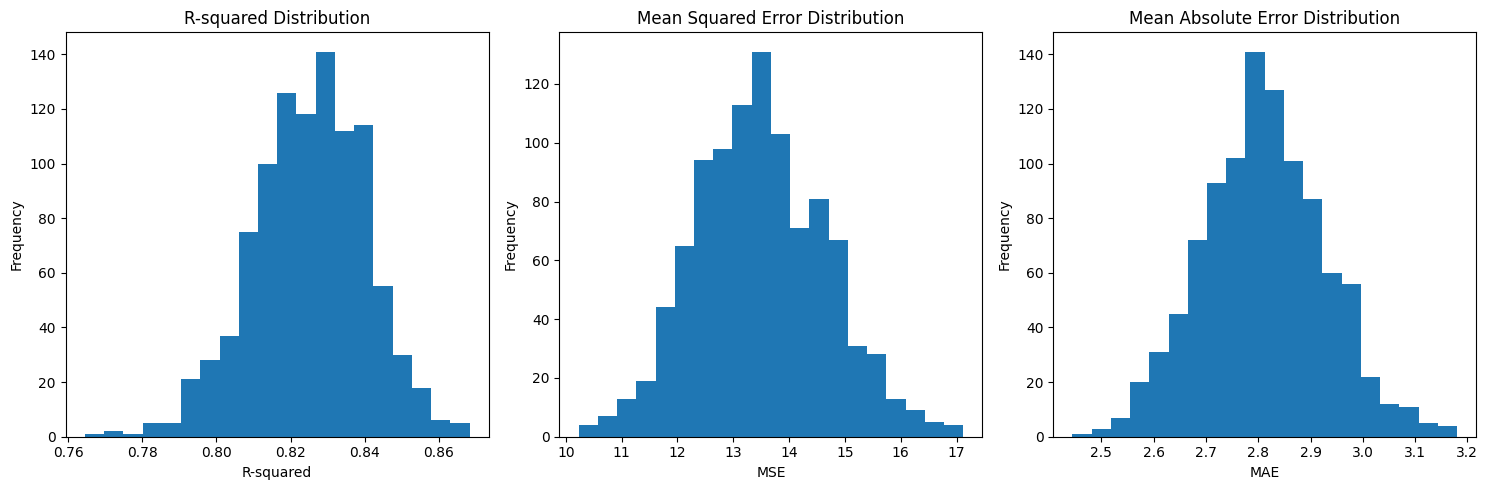

In [ ]:
from sklearn.model_selection import train_test_split
import random

n_iterations = 1000
r2_scores = []
mse_scores = []
mae_scores = []

for _ in range(n_iterations):
    indices = list(range(predictors.shape[0]))
    random.shuffle(indices) #no me salía bien el código usando los k-pliegues y según la herramienta de gemini del google colab para hacer apropiadamente el montecarlo se tienen que hacer con pliegues aleatorios.
    split_index = int(0.8 * predictors.shape[0])
    train_index = indices[:split_index]
    test_index = indices[split_index:]
    X_train, X_test = predictors[train_index], predictors[test_index]
    y_train, y_test = y[train_index], y[test_index]
    coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    y_pred = X_test @ coefficients

    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(r2_scores, bins=20)
plt.title('R-squared Distribution')
plt.xlabel('R-squared')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mse_scores, bins=20)
plt.title('Mean Squared Error Distribution')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(mae_scores, bins=20)
plt.title('Mean Absolute Error Distribution')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


1.5

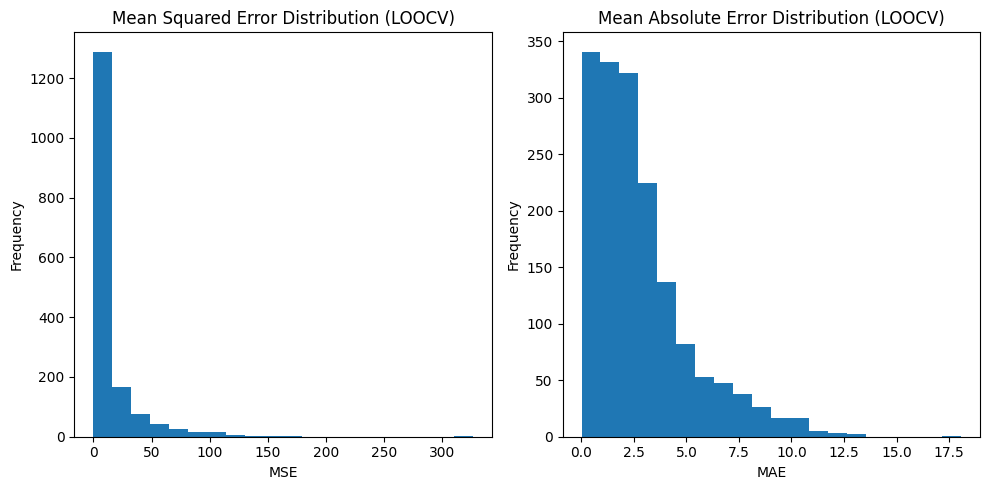

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
mse_scores = []
mae_scores = []

for train_index, test_index in loo.split(predictors):
    X_train, X_test = predictors[train_index], predictors[test_index]
    y_train, y_test = y[train_index], y[test_index]
    coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    y_pred = X_test @ coefficients

    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(mse_scores, bins=20)
plt.title('Mean Squared Error Distribution (LOOCV)')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(mae_scores, bins=20)
plt.title('Mean Absolute Error Distribution (LOOCV)')
plt.xlabel('MAE')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Curiosamente, los historgramas obtenidos usando el método de Monte Carlo y el método LOOCV difieren un poco. Investigando un poco, esto probablemente se debe a que en el LOOCV, entrenas tu modelo en n-1 datos, agarrando ese último dato que dejaste afuera para probar el modelo. En cambio, con el método de Monte Carlo, enntrenas el modelo con un subset de los datos y pruebas con e subset restante, haciendo que el set de datos para entrenar el modelo sea menor y pueda haber una varianza más alta de errores. Igual eso vuelve el modelo más sensible a outliers.

1.6 (no ha jalado)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Add squared predictors to the DataFrame
for predictor in predictors:
    # Ensure predictor is a string and strip any extra spaces
    if isinstance(predictor, str):
        stripped_name = predictor.strip()
        squared_col_name = f'{stripped_name}_squared'
        df[squared_col_name] = df[stripped_name] ** 2
    else:
        print(f"Skipping non-string predictor: {predictor}")


for predictor in predictors:
    stripped_name = predictor.strip() if isinstance(predictor, str) else predictor
    squared_col_name = f'{stripped_name}_squared'
    plt.figure()
    sns.scatterplot(x=df[squared_col_name], y=y)
    plt.title(f'{squared_col_name} vs Life Expectancy')
    plt.xlabel(squared_col_name)
    plt.ylabel('Life Expectancy')
    plt.show()


KeyError: 'Measles'

In [ ]:
y = df_extended['Life expectancy ']
predictors = ['Adult Mortality', 'infant deaths', 'percentage expenditure', 'Hepatitis B',
              'Measles ', 'under-five deaths ', 'Polio', 'Total expenditure', ' HIV/AIDS',
              'GDP', 'Population', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

for predictor in predictors:
    plt.figure()
    sns.scatterplot(x=df[predictor], y=y)
    plt.title(f'{predictor} vs Life Expectancy')
    plt.xlabel(predictor)
    plt.ylabel('Life Expectancy')
    plt.show()

1.7

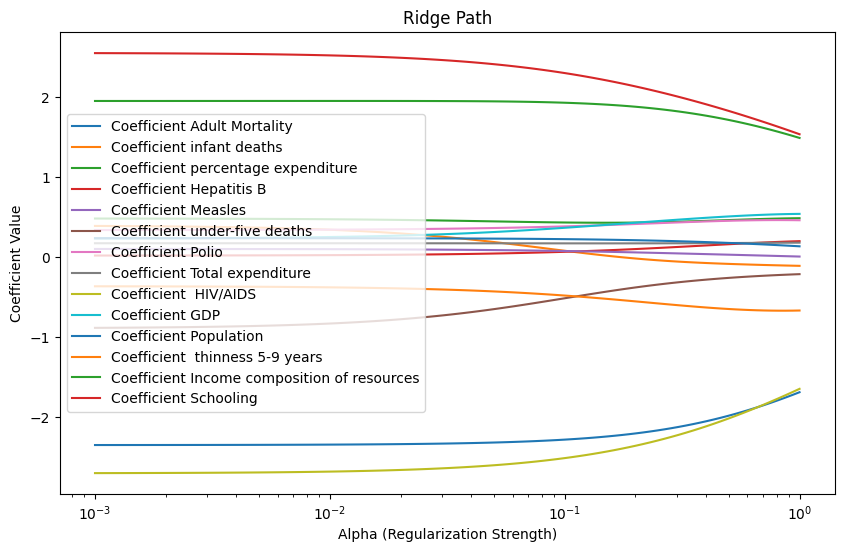

In [ ]:
from sklearn.preprocessing import StandardScaler
X = predictors.values
y = df['Life expectancy '].values
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized = np.c_[np.ones(X_standardized.shape[0]), X_standardized]
alphas = np.logspace(-3, 0, 100)
coefficients_path = [] #tuve que usar esta librería que no entiendo para que el modelo jalara y no me marcara un error de nan values.

n_iterations = 1000
learning_rate = 0.01

def gradient_descent_ridge(X, y, alpha, learning_rate, n_iterations):
    m = len(y)
    theta = np.zeros(X.shape[1])
    for iteration in range(n_iterations):
        gradients = (2/m) * X.T @ (X @ theta - y) + 2 * alpha * theta
        theta -= learning_rate * gradients
    return theta

for alpha in alphas:
    theta = gradient_descent_ridge(X_standardized, y, alpha, learning_rate, n_iterations)
    coefficients_path.append(theta)

coefficients_path = np.array(coefficients_path)

plt.figure(figsize=(10, 6))
for i in range(1, X_standardized.shape[1]):
    plt.plot(alphas, coefficients_path[:, i], label=f'Coefficient {predictors.columns[i-1]}')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Path')
plt.legend(loc='best')
plt.show()


1.8

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.365e+02, tolerance: 1.275e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.506e+02, tolerance: 1.275e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.713e+02, tolerance: 1.275e

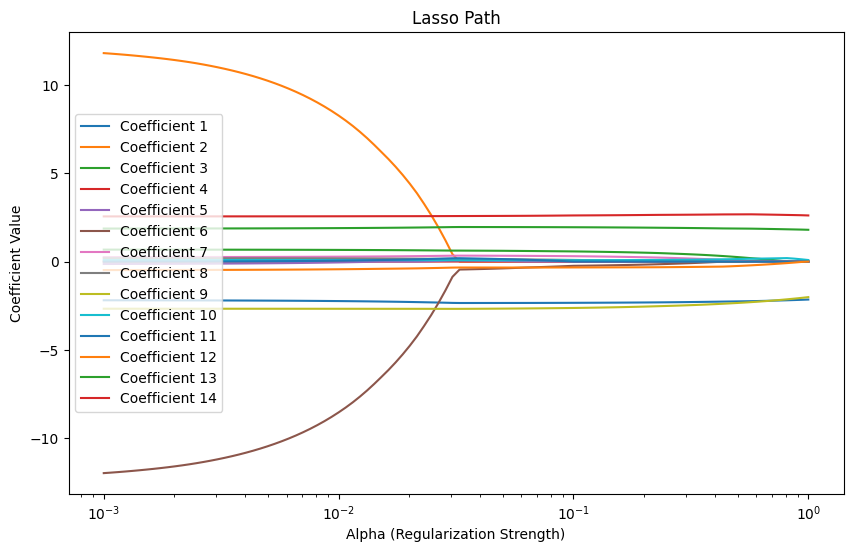

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X = predictors
y = df['Life expectancy '].values.reshape(-1, 1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X) #tuve que usar esta librería que no entiendo, para que el modelo jalara y no me marcara un error de nan values.

alphas = np.logspace(-3, 0, 100)
coefficients_path = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_standardized, y)
    coefficients_path.append(lasso_model.coef_)

plt.figure(figsize=(10, 6))
for i in range(X_standardized.shape[1]):
    plt.plot(alphas, [coeffs[i] for coeffs in coefficients_path], label=f'Coefficient {i+1}')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Path')
plt.legend()
plt.show()

1. ¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?
Si, el R squared es cercano a uno de manera consistente. Esto indica que el modelo es efectivo.
2. ¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.
Si, se observa una variabilidad en el MSE y MAE al momento de usar LOOCV y Monte Carlo. Principalmente en el MAE, yo creo que esto se debe a que en el LOOCV debido a que el modelo es entrenado con casi todos los datos (n-1), se nota más que el MAE es menos sensible a los outliers.
3. ¿Qué modelo es mejor para los datos del problema, el lineal o el cuadrático? ¿Por qué?
Es mejor el modelo lineal, en este set de datos, no observamos que la relación entre las variables fuera más compleja que una relación lineal.
4. ¿Qué variables son más relevantes para el modelo según Ridge y Lasso?
Percentage expenditure y Hepatitis B salen como los modelos más relevantes en ambas gráficas.
5. ¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?
Si, la relación es lineal en muchos casos. Por ejemplo Entre más grande es el percentage expenditure más alto es el life expectancy. Así es con muchas variables dentro del dataframe.


# New Section

Ejercicio2

In [ ]:
import pandas as pd

df = pd.read_csv('/content/parkinsons_updrs.data', encoding='ascii')

df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


2.1

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1)
y = df['total_UPDRS']

model = LinearRegression()
scores = cross_val_score(model, predictors, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.92608943 0.72217093 0.86772763 0.64704464 0.83497529]
Average cross-validation score: 0.7996015823543356


2.2

In [ ]:
from sklearn.feature_selection import RFE
import numpy as np

predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=predictors.shape[1])
scores = cross_val_score(rfe, predictors, y, cv=5)
optimal_num_features = np.argmax(scores) + 1  # +1 porque el indexing empieza en 0
print("Optimal number of features:", optimal_num_features)
rfe_optimal = RFE(estimator=model, n_features_to_select=optimal_num_features)
rfe_optimal.fit(predictors, y)
selected_features = predictors.columns[rfe_optimal.support_]
print("Selected features:", selected_features)

Optimal number of features: 1
Selected features: Index(['Jitter(Abs)'], dtype='object')


2.3

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

predictors = df.drop(['total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward')
sfs.fit(predictors, y)
selected_features = predictors.columns[sfs.support_]

print("Selected features:", selected_features)
scores = cross_val_score(model, predictors[selected_features], y, cv=5)
print("Cross-validation scores:", scores)

Selected features: Index(['sex', 'test_time', 'motor_UPDRS', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:DDP', 'Shimmer:APQ3', 'Shimmer:DDA', 'NHR', 'RPDE'],
      dtype='object')
Cross-validation scores: [0.9196954  0.70412303 0.85863916 0.75788159 0.8610854 ]


2.4

In [ ]:
from sklearn.feature_selection import RFE

predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=predictors.shape[1])
scores = cross_val_score(rfe, predictors, y, cv=5)

optimal_num_features = np.argmax(scores) + 1
print("Optimal number of features:", optimal_num_features)

rfe_optimal = RFE(estimator=model, n_features_to_select=optimal_num_features)
rfe_optimal.fit(predictors, y)
selected_features = predictors.columns[rfe_optimal.support_]
print("Selected features:", selected_features)

Optimal number of features: 1
Selected features: Index(['Jitter(Abs)'], dtype='object')


2.5

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor


y = df['total_UPDRS']
model = KNeighborsRegressor(n_neighbors=5) #el numero de vecinos puede ser lo que sea pero el default es 5
scores = cross_val_score(model, predictors, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [-0.01438931  0.22367716  0.59209264 -1.11675618 -0.00498127]
Average cross-validation score: -0.06407139271126228


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1, errors='ignore')
y = df['total_UPDRS'].values.ravel()
initial_model = RandomForestRegressor(n_estimators=100)
rfe = RFE(estimator=initial_model, n_features_to_select=1)
rfe.fit(predictors, y)
ranking = rfe.ranking_
optimal_num_features = np.argmin(ranking) + 1
print("Optimal number of features:", optimal_num_features)
top_features = predictors.columns[np.argsort(ranking)[:optimal_num_features]]
model = KNeighborsRegressor(n_neighbors=5)
scores = cross_val_score(model, predictors[top_features], y, cv=5)
print("Selected features:", top_features)
print("Cross-validation scores with selected features:", scores)
print("Average cross-validation score:", scores.mean())


KeyboardInterrupt: 

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

predictors = df.drop(['total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()
model = KNeighborsRegressor(n_neighbors=5)
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward', cv=5)
sfs.fit(predictors, y)
selected_features = predictors.columns[sfs.get_support()]

print("Selected features:", selected_features)
scores = cross_val_score(model, predictors[selected_features], y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Selected features: Index(['sex', 'motor_UPDRS', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA'],
      dtype='object')
Cross-validation scores: [0.87900996 0.59841071 0.84426425 0.57429182 0.86790535]
Average cross-validation score: 0.7527764193495166


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1, errors='ignore')
y = df['total_UPDRS'].values.ravel()
initial_model = RandomForestRegressor(n_estimators=100)
rfe = RFE(estimator=initial_model, n_features_to_select=1)
rfe.fit(predictors, y)
ranking = rfe.ranking_
optimal_num_features = np.argmin(ranking) + 1
print("Optimal number of features:", optimal_num_features)
top_features = predictors.columns[np.argsort(ranking)[:optimal_num_features]]
model = KNeighborsRegressor(n_neighbors=5)
scores = cross_val_score(model, predictors[top_features], y, cv=5)
print("Selected features:", top_features)
print("Cross-validation scores with selected features:", scores)
print("Average cross-validation score:", scores.mean())


Optimal number of features: 5
Selected features: Index(['motor_UPDRS', 'subject#', 'age', 'test_time', 'sex'], dtype='object')
Cross-validation scores with selected features: [-0.03637974 -0.03923668  0.58070661 -1.00372373 -0.01250508]
Average cross-validation score: -0.10222772406562461


2.6

Polynomial Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1)
y = df['total_UPDRS']

degree = 2 #polinomio de segundo grado como default
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
scores = cross_val_score(model, predictors, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [ 0.83902034  0.46057263  0.79052336  0.55079484 -0.83902538]
Average cross-validation score: 0.36037715961135086


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

predictors = df.drop(['total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()
correlations = predictors.corrwith(df['total_UPDRS']).abs()
ranked_features = correlations.sort_values(ascending=False).index
best_score = -np.inf
best_num_features = 0

scores = []
for i in range(1, len(ranked_features) + 1):
    selected_features = ranked_features[:i]
    X_selected = predictors[selected_features]
    degree = 2
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    score = cross_val_score(model, X_selected, y, cv=5).mean()
    scores.append(score)

    if score > best_score:
        best_score = score
        best_num_features = i

optimal_features = ranked_features[:best_num_features]

print("Optimal number of features:", best_num_features)
print("Selected features:", list(optimal_features))
X_optimal = predictors[optimal_features]
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
final_score = cross_val_score(model, X_optimal, y, cv=5).mean()
print("Final cross-validation score with optimal features:", final_score)


Optimal number of features: 1
Selected features: ['motor_UPDRS']
Final cross-validation score with optimal features: 0.8163372047394389


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

# Define predictors and target variable
predictors = df.drop(['total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()

# Create and fit the PolynomialFeatures transformer
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(predictors)

# Create a polynomial regression model
model = LinearRegression()

# Limit the number of features to select to speed up the process
max_features_to_select = min(10, X_poly.shape[1])  # Adjust as necessary

# Perform Sequential Feature Selection (SFS) with the polynomial regression model
sfs = SequentialFeatureSelector(model, n_features_to_select=max_features_to_select, direction='forward', cv=5)
sfs.fit(X_poly, y)

# Get the support array and transform it back to the original features
selected_features = np.array(poly.get_feature_names_out(input_features=predictors.columns))[sfs.get_support()]

# Display the selected features
print("Selected features:", selected_features)

# Evaluate the model with the selected features
scores = cross_val_score(model, X_poly[:, sfs.get_support()], y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


## Tuve que pedirle a Gemini que me arreglara mi código. No computaba porque usar sfs y un modelo polinomial era muy difícil de computar. Báscimaente se limitó el número de features a seleccionar para poder corrrerlo.

Selected features: ['1' 'subject# sex' 'subject# motor_UPDRS' 'age RPDE' 'sex Shimmer:DDA'
 'test_time motor_UPDRS' 'test_time HNR' 'motor_UPDRS^2' 'HNR^2' 'DFA^2']
Cross-validation scores: [0.90501461 0.866287   0.8111854  0.82681284 0.89550891]
Average cross-validation score: 0.8609617517119658


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Define predictors and target variable
predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()

# Create and apply PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(predictors)

# Initialize the linear regression model
model = LinearRegression()

# Perform RFE with the model on the polynomial features, initially selecting all features
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(X_poly, y)

# Perform cross-validation to find the optimal number of features
n_features = X_poly.shape[1]
scores = []

for i in range(1, n_features + 1):
    rfe = RFE(estimator=model, n_features_to_select=i, step=1)
    score = cross_val_score(rfe, X_poly, y, cv=5).mean()
    scores.append(score)

# Find the optimal number of features
optimal_num_features = np.argmax(scores) + 1
print("Optimal number of features:", optimal_num_features)

# Refit RFE with the optimal number of features
rfe_optimal = RFE(estimator=model, n_features_to_select=optimal_num_features, step=1)
rfe_optimal.fit(X_poly, y)

# Get the selected feature names
selected_features = np.array(poly.get_feature_names_out(input_features=predictors.columns))[rfe_optimal.support_]
print("Selected features:", selected_features)



KeyboardInterrupt: 

Me pasó lo mismo que con el sfs pero en verdad no encontré solución que me dejara correr el código. Sin embargo creo que si sería manera correcta de hacerlo

Decision tree

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1)
y = df['total_UPDRS']
model = DecisionTreeRegressor()
scores = cross_val_score(model, predictors, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.79263532 0.31497104 0.75616887 0.45113407 0.76047086]
Average cross-validation score: 0.6150760315842941


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

predictors = df.drop(['total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()
correlations = predictors.corrwith(df['total_UPDRS']).abs()
ranked_features = correlations.sort_values(ascending=False).index

best_score = -np.inf
best_num_features = 0

scores = []
for i in range(1, len(ranked_features) + 1):
    selected_features = ranked_features[:i]
    X_selected = predictors[selected_features]

    model = DecisionTreeRegressor()

    score = cross_val_score(model, X_selected, y, cv=5).mean()
    scores.append(score)

    if score > best_score:
        best_score = score
        best_num_features = i

optimal_features = ranked_features[:best_num_features]

print("Optimal number of features:", best_num_features)
print("Selected features:", list(optimal_features))
X_optimal = predictors[optimal_features]
model = DecisionTreeRegressor()
final_score = cross_val_score(model, X_optimal, y, cv=5).mean()
print("Final cross-validation score with optimal features:", final_score)


Optimal number of features: 1
Selected features: ['motor_UPDRS']
Final cross-validation score with optimal features: 0.6762827757494897


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

predictors = df.drop(['total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()
model = DecisionTreeRegressor()
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward', cv=5)
sfs.fit(predictors, y)
selected_features = predictors.columns[sfs.get_support()]

print("Selected features:", selected_features)
scores = cross_val_score(model, predictors[selected_features], y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Selected features: Index(['subject#', 'sex', 'test_time', 'motor_UPDRS', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ11'],
      dtype='object')
Cross-validation scores: [0.90183309 0.33096742 0.78808412 0.79377489 0.71983466]
Average cross-validation score: 0.7068988374713769


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np
predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()

model = DecisionTreeRegressor()
rfe = RFE(estimator=model, n_features_to_select=predictors.shape[1])
rfe.fit(predictors, y)
n_features = predictors.shape[1]
scores = []

for i in range(1, n_features + 1):
    rfe = RFE(estimator=model, n_features_to_select=i)
    score = cross_val_score(rfe, predictors, y, cv=5).mean()
    scores.append(score)

optimal_num_features = np.argmax(scores) + 1
print("Optimal number of features:", optimal_num_features)

rfe_optimal = RFE(estimator=model, n_features_to_select=optimal_num_features)
rfe_optimal.fit(predictors, y)
selected_features = predictors.columns[rfe_optimal.support_]
print("Selected features:", selected_features)


Optimal number of features: 1
Selected features: Index(['motor_UPDRS'], dtype='object')


Exponential

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1)
y = df['total_UPDRS']

# Apply log transformation to the target variable (for exponential regression)
y_log = np.log(y + 1e-9)  # Adding a small constant to avoid log(0)
model = LinearRegression()
scores = cross_val_score(model, predictors, y_log, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.90051162 0.65265358 0.72926996 0.84790181 0.6663581 ]
Average cross-validation score: 0.7593390133902872


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd


predictors = df.drop(['total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()

# Apply log transformation to the target variable (for exponential regression)
y_log = np.log(y + 1e-9)  # Adding a small constant to avoid log(0)
y_log_series = pd.Series(y_log)  # Convert to pandas Series for compatibility with corrwith

# Calculate correlation with the log-transformed target variable and rank features
correlations = predictors.corrwith(y_log_series).abs()

ranked_features = correlations.sort_values(ascending=False).index
best_score = -np.inf
best_num_features = 0
scores = []

for i in range(1, len(ranked_features) + 1):
    selected_features = ranked_features[:i]
    X_selected = predictors[selected_features]
    model = LinearRegression()
    score = cross_val_score(model, X_selected, y_log, cv=5).mean()
    scores.append(score)

    if score > best_score:
        best_score = score
        best_num_features = i

optimal_features = ranked_features[:best_num_features]

print("Optimal number of features:", best_num_features)
print("Selected features:", list(optimal_features))
X_optimal = predictors[optimal_features]
model = LinearRegression()
final_score = cross_val_score(model, X_optimal, y_log, cv=5).mean()
print("Final cross-validation score with optimal features:", final_score)
model.fit(X_optimal, y_log)
predictions = np.exp(model.predict(X_optimal))  # Convert predictions back to original scale

print("Exponential model predictions:", predictions)



Optimal number of features: 13
Selected features: ['motor_UPDRS', 'age', 'subject#', 'RPDE', 'HNR', 'PPE', 'Shimmer:APQ11', 'Shimmer(dB)', 'DFA', 'Shimmer', 'Shimmer:APQ5', 'Jitter(Abs)', 'Jitter(%)']
Final cross-validation score with optimal features: 0.7808406548501784
Exponential model predictions: [37.39393794 36.8692191  38.11988976 ... 26.49165158 27.18820074
 26.76005284]


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

predictors = df.drop(['total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()

# Apply log transformation to the target variable (for exponential regression)
y_log = np.log(y + 1e-9)  # Adding a small constant to avoid log(0)
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward', cv=5)
sfs.fit(predictors, y_log)
selected_features = predictors.columns[sfs.get_support()]
print("Selected features:", selected_features)
scores = cross_val_score(model, predictors[selected_features], y_log, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())
model.fit(predictors[selected_features], y_log)
predictions = np.exp(model.predict(predictors[selected_features]))  # Convert predictions back to original scale
print("Exponential model predictions:", predictions)


Selected features: Index(['age', 'sex', 'test_time', 'motor_UPDRS', 'Jitter(%)', 'Jitter(Abs)',
       'Shimmer:DDA', 'RPDE', 'DFA', 'PPE'],
      dtype='object')
Cross-validation scores: [0.91667218 0.69632559 0.7392186  0.8706316  0.77794999]
Average cross-validation score: 0.8001595922496854
Exponential model predictions: [36.55083295 37.342676   37.78881076 ... 27.21539906 27.71382159
 27.16803537]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()

# Apply log transformation to the target variable (for exponential regression)
y_log = np.log(y + 1e-9)  # Adding a small constant to avoid log(0)
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=predictors.shape[1])
rfe.fit(predictors, y_log)
n_features = predictors.shape[1]
scores = []

for i in range(1, n_features + 1):
    rfe = RFE(estimator=model, n_features_to_select=i)
    score = cross_val_score(rfe, predictors, y_log, cv=5).mean()
    scores.append(score)

optimal_num_features = np.argmax(scores) + 1
print("Optimal number of features:", optimal_num_features)
rfe_optimal = RFE(estimator=model, n_features_to_select=optimal_num_features)
rfe_optimal.fit(predictors, y_log)
selected_features = predictors.columns[rfe_optimal.support_]
print("Selected features:", selected_features)
model.fit(predictors[selected_features], y_log)
predictions = np.exp(model.predict(predictors[selected_features]))  # Convert predictions back to original scale
print("Exponential model predictions:", predictions)


Optimal number of features: 15
Selected features: Index(['age', 'sex', 'motor_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'NHR', 'HNR', 'RPDE', 'PPE'],
      dtype='object')
Exponential model predictions: [37.50111927 37.14194089 38.05549023 ... 26.56995048 27.08632633
 26.70437259]


Logarithmic Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1)
y = df['total_UPDRS']

# Apply log transformation to the predictors
predictors_log = np.log(predictors + 1e-9)

# Usé esta librería para sacar el promedio de las columnas y reemplazar con eso los nan values. No pude hacerlo de otro modo pq tenía un error de nan values.
imputer = SimpleImputer(strategy='mean')
predictors_log_imputed = imputer.fit_transform(predictors_log)

model = LinearRegression()
scores = cross_val_score(model, predictors_log_imputed, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())



/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Cross-validation scores: [0.68361205 0.30721258 0.86024667 0.35754183 0.5924641 ]
Average cross-validation score: 0.5602154480624323


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

predictors = df.drop(['total_UPDRS'], axis=1)
y = df['total_UPDRS']

# Apply log transformation to the predictors
# Add a small constant to avoid taking the log of zero if necessary
predictors_log = np.log(predictors + 1e-9)

# Handle missing values using SimpleImputer to fill with the mean
imputer = SimpleImputer(strategy='mean')
predictors_log_imputed = imputer.fit_transform(predictors_log)
predictors_log_imputed = pd.DataFrame(predictors_log_imputed, columns=predictors.columns)

# Calculate correlation with the target variable and rank features
correlations = predictors_log_imputed.corrwith(y).abs()
ranked_features = correlations.sort_values(ascending=False).index

# Initialize variables to store the best number of features and the corresponding score
best_score = -np.inf
best_num_features = 0
scores = []

for i in range(1, len(ranked_features) + 1):
    selected_features = ranked_features[:i]
    X_selected = predictors_log_imputed[selected_features]
    model = LinearRegression()
    score = cross_val_score(model, X_selected, y, cv=5).mean()
    scores.append(score)

    if score > best_score:
        best_score = score
        best_num_features = i

optimal_features = ranked_features[:best_num_features]

print("Optimal number of features:", best_num_features)
print("Selected features:", list(optimal_features))
X_optimal = predictors_log_imputed[optimal_features]
model = LinearRegression()
final_score = cross_val_score(model, X_optimal, y, cv=5).mean()
print("Final cross-validation score with optimal features:", final_score)

# Tuve que hacer lo mismo de las means en todos los incisios de la regresión logarítmica

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Optimal number of features: 1
Selected features: ['motor_UPDRS']
Final cross-validation score with optimal features: 0.672875326902126


Me falta

1.
Terminar el de añadir columnas.
Responder preguntas

2.

2 modelos para el último inciso
Responder preguntas

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

predictors = df.drop(['total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()

# Apply log transformation to the predictors
# Add a small constant to avoid taking the log of zero if necessary
predictors_log = np.log(predictors + 1e-9)

# Handle missing values using SimpleImputer to fill with the mean
imputer = SimpleImputer(strategy='mean')
predictors_log_imputed = imputer.fit_transform(predictors_log)

# Convert the imputed array back to a DataFrame for easier manipulation
predictors_log_imputed = pd.DataFrame(predictors_log_imputed, columns=predictors.columns)

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward', cv=5)
sfs.fit(predictors_log_imputed, y)
selected_features = predictors.columns[sfs.get_support()]
print("Selected features:", selected_features)
scores = cross_val_score(model, predictors_log_imputed[selected_features], y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Selected features: Index(['sex', 'test_time', 'motor_UPDRS', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:DDP', 'Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:DDA'],
      dtype='object')
Cross-validation scores: [0.87075852 0.26693515 0.84070957 0.70575402 0.64378156]
Average cross-validation score: 0.6655877644196735


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

predictors = df.drop(['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'DFA', 'total_UPDRS'], axis=1)
y = df['total_UPDRS'].values.ravel()

# Apply log transformation to the predictors
# Add a small constant to avoid taking the log of zero if necessary
predictors_log = np.log(predictors + 1e-9)
imputer = SimpleImputer(strategy='mean')
predictors_log_imputed = imputer.fit_transform(predictors_log)
predictors_log_imputed = pd.DataFrame(predictors_log_imputed, columns=predictors.columns)
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=predictors_log_imputed.shape[1])
rfe.fit(predictors_log_imputed, y)
n_features = predictors_log_imputed.shape[1]
scores = []

for i in range(1, n_features + 1):
    rfe = RFE(estimator=model, n_features_to_select=i)
    score = cross_val_score(rfe, predictors_log_imputed, y, cv=5).mean()
    scores.append(score)

optimal_num_features = np.argmax(scores) + 1
print("Optimal number of features:", optimal_num_features)
rfe_optimal = RFE(estimator=model, n_features_to_select=optimal_num_features)
rfe_optimal.fit(predictors_log_imputed, y)
selected_features = predictors.columns[rfe_optimal.support_]
print("Selected features:", selected_features)
final_score = cross_val_score(model, predictors_log_imputed[selected_features], y, cv=5).mean()
print("Final cross-validation score with optimal features:", final_score)


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Optimal number of features: 1
Selected features: Index(['motor_UPDRS'], dtype='object')
Final cross-validation score with optimal features: 0.672875326902126


Usé SimpleImputer en todos los incisos de regresión logarítmica para solcuionar el tema de nan values, lo explico en algunos bloques.

2.7

1. Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?

Creo que no necesariamente es lo más adecuado ya que la relación entre "y" y las variables predictoras no es necesariamente lineal en todos los casos.

2. ¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?

Observando los resultados de mi modelo original, creo que RFE es el que identifica de manera más efectiva cuál es el feature más relevante.

3. Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?

['sex', 'test_time', 'motor_UPDRS', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:DDP', 'Shimmer:APQ3', 'Shimmer:DDA', 'NHR', 'RPDE']
       Estas son las características que más sobresalieron al hacer el paso 3 con todos los modelos.

4. ¿Los modelos de regresión no lineal funcionaron mejor que el lineal? ¿Por qué?

En su mayoría, cada uno me dio mas features diferentes a considerar como relevantes por lo que creo que funciona para las variables más complejas en la base de datos.


5. ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.

Sí, un aspecto interesante es que la característica motor_UPDRS por si sola explica la mayor parte de la variabilidad en total_UPDRS